In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
from sklearn.datasets.sample_generators import make_blobs
X,y_true=make_blobs(n_samples=1,center=2,clusters_std=3,random_state=None)
plt.scatter(X[:,0],X[:,1],s=500)

In [15]:
#Create 4 clusters.
from sklearn.cluster import KMeans
kmeans=Kmeans(n_clusters=4)
kmeans.fit(X)

In [17]:
kmeans.fit(X)

In [19]:
y_pred=kmeans.predict(X)

In [22]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    cls=np.random.RandomState(rseed)
    i=cls.permutation(X.shape[0])[n_clusters]
    centers=X[i]
    while True:
        labels=pairwise_distances_argmin(X,centers)
        new_centers=np.array([X[labels==i].mean(0) for i in range (n_clusters)])
        
        if np.all(centers==new_centers):
            break;
            
        centers=new_centers
    return centers, labels

centers,labels=find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c_labels,s=50,cmap='viridis')

plt.scatter(centers[:,0],centers[:,1],c'black',s=200,alpha=0.5)

Image Processing

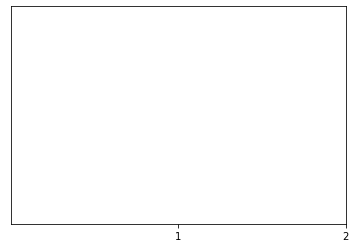

In [34]:
from sklearn.datasets import load_sample_image
flwr=load_sample_image("Darlias flower")
X=plt.axes(xticks=[1,2],yticks=[2])
X.imshow(flwr);

In [ ]:
flwr.shape

In [38]:
data=flwr/255
data=data.reshape(427*640,3)
data.shape

In [1]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors=data
        
        # Random data subset
        flg=np.random.RandomState(0)
        i=flg.permutation(data.shape[0])[:N]
        colors=colors[i]
        R,G,B=data[i].T
        
        fig, X=plt.subplots(1,2,figsize=(16,6))
        X[0].scatter(R,G,color=colors,markers='.')
        X[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
        
        X[1].scatter(R,B,color=colors,markers='.')
        X[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
        
        fig.subtitle(title,size=20);


In [3]:
plot_pixels(data,title='Color input 16M Possible colors')

In [8]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans()
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans_predict(data)]

plot_pixels(data, colors=new_colors title='Color Reduced to 16 colors'

In [ ]:
flg_recolored=new_colors.reshape(flg.shape)

fig, X=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
X[0].imshow(flg)
X[0].set_title('Original Image',size=16)
X[0].imshow(flg_recolored)
X[0].set_title('16_color Image', size=16)